In [1]:
import sys
sys.path.append('..')

In [8]:
import Simulator.simulator as simulator
import Strategies.ML_Stoikov as Stoikov
import Simulator.get_info as get_info
import Simulator.load_data as load_data

from importlib import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path_to_file = '../data/final_test/'
run_time = pd.Timedelta(5, 'h').value

In [9]:
reload(simulator)
reload(Stoikov)
reload(get_info)
reload(load_data)

<module 'Simulator.load_data' from 'c:\\Users\\Admin\\Desktop\\HFT\\Paper tasks 1\\hft_\\Simulator\\load_data.py'>

In [10]:
md = load_data.load_md_from_file(path=path_to_file, run_time=run_time)

In [11]:
latency = pd.Timedelta(10, 'ms').value
md_latency = pd.Timedelta(10, 'ms').value

sim = simulator.Sim(md, latency, md_latency)

In [12]:
#delay between orders
delay = pd.Timedelta(0.1, 's').value

strategy = Stoikov.Strategy(
    delay=delay,
    risk_koef=10,
    order_fees=-0.00004,
    min_asset_value=0.001,
)

In [13]:
trades_list, md_list, updates_list, all_orders = strategy.run(sim)

In [14]:
logs = strategy.logs

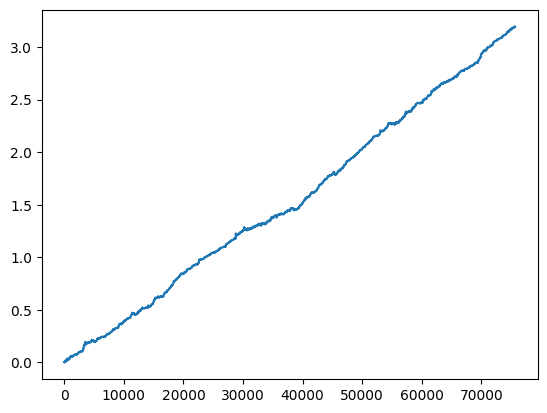

In [15]:
plt.plot(logs['pnl'])

In [16]:
from Strategies.Metrics import metrics
pnl_liq = logs['pnl_with_liq']
metrics.SharpeRatio(pd.Series(pnl_liq))
# Metrics.MaximumDrawdown(pd.Series(pnl_liq))
# Metrics.MaximumDailyDrawdown(pd.Series(pnl_liq))

0.25472312535745817

In [18]:
metrics.MaximumDrawdown(pd.Series(logs['pnl_with_liq']))

-4.817731181753603

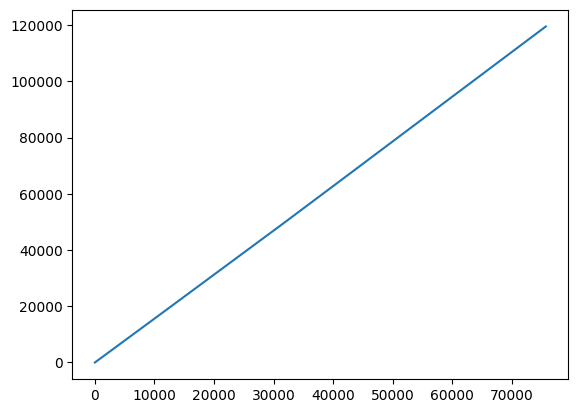

In [19]:
plt.plot(logs['total_liq'])